In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Uso de librería "statsmodels"

Esta librería se usa mucho en aplicaciones estadísticas, pero tiene un compendio de métodos y funciones muy útiles para estimar modelos usando polinomios autorregresivos.

## Experimento de identificación

**Paso 1:** En este ejemplo, generamos 1000 observaciones de datos, incluyendo dos variables exógenas (x1 y x2) y una variable endógena (y).

,y,u1,u2,y_1,y_2,u1_1,u1_2,u2_1,u2_2
0,14.066202,-5.428153,4.986727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-11.962107,1.414892,-7.531474,14.066202,0.000000,-5.428153,0.000000,4.986727,0.000000
2,44.014042,-2.893001,8.257183,-11.962107,14.066202,1.414892,-5.428153,-7.531474,4.986727
3,13.765939,-12.133396,-2.144563,44.014042,-11.962107,-2.893001,1.414892,8.257183,-7.531474
4,-0.126145,6.329681,-4.333702,13.765939,44.014042,-12.133396,-2.893001,-2.144563,8.257183
...,...,...,...,...,...,...,...,...,...
95,13.915746,0.885962,-0.149840,-38.474315,-17.552272,-1.774122,-2.744602,1.957921,-4.890289
96,37.516011,0.997911,-0.630589,13.915746,-38.474315,0.885962,-1.774122,-0.149840,1.957921
97,8.313891,0.985095,-16.155275,37.516011,13.915746,0.997911,0.885962,-0.630589,-0.149840
98,3.210888,-1.346467,-0.554254,8.313891,37.516011,0.985095,0.997911,-16.155275,-0.630589


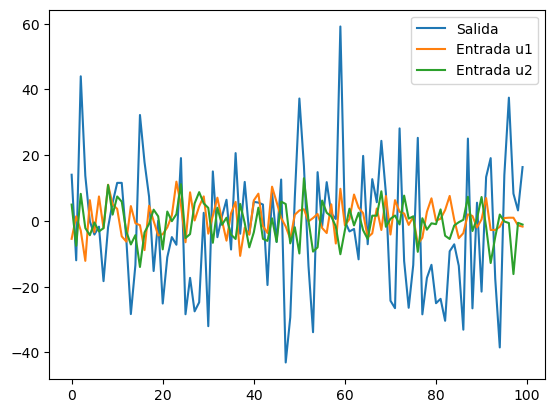

In [18]:
# Generar datos simulados
np.random.seed(123)
nobs = 100
exog = 5*np.random.randn(nobs,2)
endog = 20*np.random.randn(nobs)
data = pd.DataFrame(np.column_stack((endog, exog)), columns=['y', 'u1', 'u2'])

data['y_1'] = data['y'].shift(periods=1);
data['y_2'] = data['y'].shift(periods=2);
data['u1_1'] = data['u1'].shift(periods=1);
data['u1_2'] = data['u1'].shift(periods=2);
data['u2_1'] = data['u2'].shift(periods=1);
data['u2_2'] = data['u2'].shift(periods=2);

#data.dropna(inplace=True);
data = data.fillna(0)

plt.plot(data.y)
plt.plot(data.u1)
plt.plot(data.u2)
plt.legend(['Salida','Entrada u1','Entrada u2'])
data

**Paso 2:** A continuación, dividiremos los datos en conjuntos de entrenamiento y prueba:

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
nobs_train = 23
train_data = data[:nobs_train]
test_data = data[nobs_train:]         

**Paso 3:** Ajustar un modelo a los datos de entrenamiento

In [20]:
# Crear matrices de diseño para los conjuntos de entrenamiento y prueba
exog_train = sm.add_constant(train_data[['y_1','u1_1','u2_1','u1_2','u2_2']])
exog_test = sm.add_constant(test_data[['y_1','u1_1','u2_1','u1_2','u2_2']])

# Ajustar el modelo 
model = sm.OLS(train_data['y'], exog_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.100
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.396
Time:                        08:35:55   Log-Likelihood:                -94.406
No. Observations:                  23   AIC:                             200.8
Df Residuals:                      17   BIC:                             207.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7867      3.635      0.216      0.8

566.5848022941663

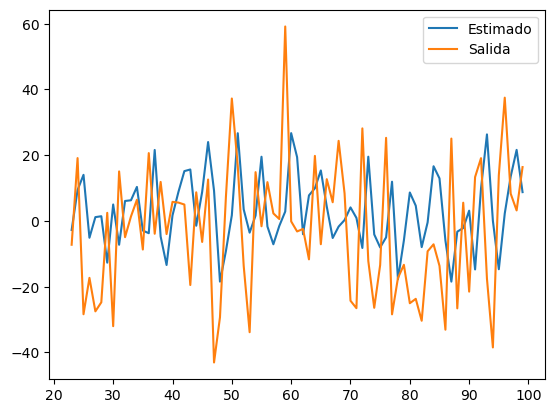

In [21]:
# VALIDAR MODELOS
# Hacer predicciones en el conjunto de prueba
preds = model.predict(exog_test)

# Calcular el error cuadrático medio de las predicciones
mse = np.mean((preds - test_data['y']) ** 2)

#ye = model.params.const + model.params.x1*data['x1'] + model.params.x2*data['x2']

plt.plot(preds)
plt.plot(test_data['y'])
plt.legend(['Estimado','Salida'])

mse
